In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Statistics is all about distributions. There are empirical distributions, and there are ideal distributions. Empirical distributions come from real-world data, while ideal distributions are purely mathematical constructions.

### The Normal Distribution ("Gaussian")

This is a very common family of distributions.

The probability density of the normal distribution is:

${\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

Plotting this function produces a normal curve. It is defined by its mean, which translates to the location of its peak, and its variance, which translates to its width. All continuous distributions have these two parameters, while some have more.

We can work with the normal curve in various ways in Python.

* Sampling from it
* Plotting its pdf in limited interval
* Freeze it and plot it (similar to 2)

#### Sampling Method

Command:

scipy.stats.norm.rvs(size=x, loc=0, scale=1)

Where:
* 'loc' is the mean
* 'scale' is the standard deviation

This command lets us draw samples from a normal distribution. It makes it so that we needn't care about limiting the x-axis as often, since the probability of getting crazy outliers is very small as long as we don't generate enormous samples. The downside is that sampling only approximates the normal curve. It only becomes perfect in the limit, that is, with infinite samples. What this method is good for is studying how samples from a normal distribution actually behaves.

After drawing a sample, the distribution is not yet a probability distribution. A probability distribution is a distribution whose probability mass, in the case of a discrete distribution, or probability density, in the continuous case, is equal to 1. The process of turning a regular distribution into a probability distribution is called normalization, and consists, in the discrete case, of dividing the frequency of a value by the sum of all frequencies, to arrive at a percentage. All empirical distribution comes in frequencies and must be transformed into percentages for ease of interpretation, and to define random variables the distribution is supposed to be a pmf for.

There are some things about normalizing probability distributions that are confusing. We must seperate normalization of probability mass and probability density. To show how the frequency of each particular value in the sample in a histogram, we need to have one bin for each value, which, when having large samples looks horrid, and which isn't very usefull. So, for large sample sizes, we should use a reasonable number of bins, easily achived by setting it to auto, or we should plot a gaussian kernel density estimate, which should have a total area of 1.

Kernel density estimate (kde) is a technique for estimating the pdf of the population to the sample. We can compare it to normalizing a sample to estimate it pmf, kde being the continuous case. When interpreting the plot of a pdf, the y-axis represents height, and the probability of a value falling within an interval is equal to the area below the curve between those values.

* https://en.wikipedia.org/wiki/Kernel_density_estimation
* http://scikit-learn.org/stable/modules/density.html
* http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/

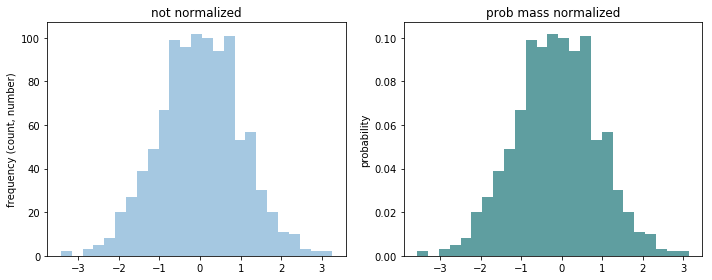

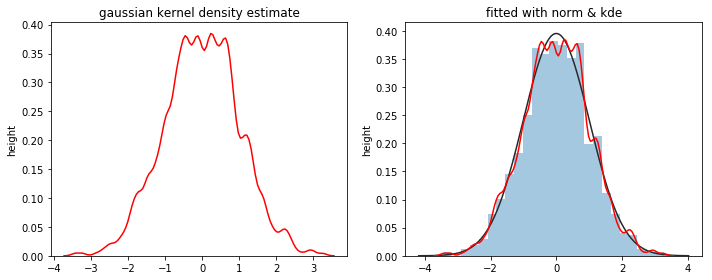

In [16]:
from scipy.stats import norm

# Draw samples from normal distribution
sample = stats.norm.rvs(size=1000, scale=1)

# Setting up the first row of graphs
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Generate non-normalized histogram
sns.distplot(sample, ax=ax1, kde=False)
ax1.set_title('not normalized')
ax1.set_ylabel('frequency (count, number)')

# Generate normalized histogram
results, edges = np.histogram(sample, bins='auto', normed=True)
binWidth = edges[1] - edges[0]
ax2.bar(edges[:-1], results*binWidth, binWidth, color='cadetblue')
ax2.set_title('prob mass normalized')
ax2.set_ylabel('probability')

# Setting up the second row of graphs
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Generate lower left
sns.kdeplot(sample, ax=ax1, bw=0.1, color='red')
ax1.set_title('gaussian kernel density estimate')
ax1.set_ylabel('height')

# Generate lower right
sns.distplot(sample, ax=ax2, kde=False, norm_hist=True, fit=norm)
sns.kdeplot(sample, ax=ax2, bw=0.1, color='red')
ax2.set_title('fitted with norm & kde')
ax2.set_ylabel('height')

#fig.subplots_adjust(hspace=0.5)
fig.tight_layout()
fig2.tight_layout()
plt.show()

#### Plotting the pdf

There are two ways to use the pdf. You can either put the norm.pdf() directly into a plot command, or you can use the norm() to assign a frozen normal curve to a variable. When employing the last method you can use .pdf(x) on that variable, as well as use other methods on it. This way you can re-use it multiple times. The end result of both methods is the same.

Since the normal curve is infinite in both directions, you'll have to specify cut-off points. We have done this in the standard way, which is slightly complicated and deserves some explanation. Normal has a method .ppf() which returns the x-value of percentile-rank we put in. We find the 0.0001 and 0.9999 percentiles. Then we use numpy's linspace function which generates 1000 points between the two percentiles. We evaluate the pdf at all those x-values.

The area under our normal curve will not exactly equal one. The closer the percentile ranks of the x-axis are the less area is under the curve. In our case this is almost entirely negligible.

Since the normal distribution is continous, the probability of getting any particular value when sampling from it is statistically equal to zero. We can only speak about the probability of a value falling within an interval. In other words we have to use integration. Formally, the probability of finding a value in [a, b] is:

${\displaystyle \operatorname {P} [a\leq X\leq b]=\int _{a}^{b}f(x)\,dx}$


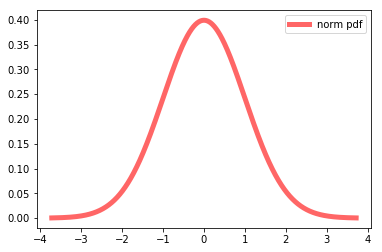

In [13]:
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 1000)
plt.plot(x, stats.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.legend()
plt.show()

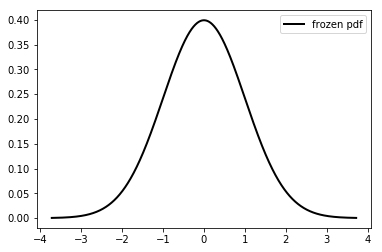

In [12]:
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 1000)
rv = stats.norm(loc=0, scale=1)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.legend()
plt.show()

#### Integration over pdfs

In [68]:
import scipy.integrate as ig
import math

area = ig.quad(lambda x: stats.norm.pdf(x),-math.inf,+math.inf)[0]
print("Area under normal curve: " + str(area))

Area under normal curve: 0.9999999999999998


#### Continuous distributions shared methods

All continous distributions in SciPy share the following methods.

- continous.mean()
- continous.std()


- continous.rvs()  -  # random variable
- continous.pdf()  -  # probability density function
- continous.cdf()  -  # cumulative distribution function
- continous.ppf()  -  # percent point function (inv. cdf)
- continous.sf()   -  # survival function
- continous.isf()  -  # inverse survival function


- continous.stats()
- continous.moment()

#### Cumulative Distribution Function

The cumulative distribution function returns the area under the curve of the pdf which is less than or equal to its input.

$F_{X}(x)=\operatorname {P} (X\leq x)$

The cdf of a continuous random variable is an integral of its pdf (fx).

$F_{X}(x)=\int _{-\infty }^{x}f_{X}(t)\,dt$

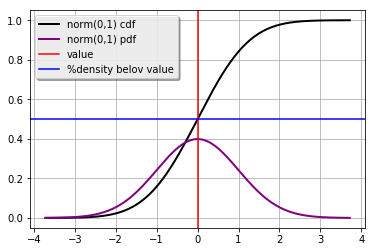

In [21]:
from scipy.stats import norm

x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 1000)

value = 0
cdf_x = stats.norm.cdf(value)

# Plotting pdf directly
plt.plot(x, stats.norm.cdf(x), 'black', lw=2, label='norm(0,1) cdf')
plt.plot(x, stats.norm.pdf(x), 'purple', lw=2, label='norm(0,1) pdf')
plt.axvline(value, color='r', label='value')
plt.axhline(cdf_x, color='b', label='%density belov value')

plt.grid(True)
plt.legend(shadow=True)
plt.show()